In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size':22})

import warnings
warnings.filterwarnings('ignore')

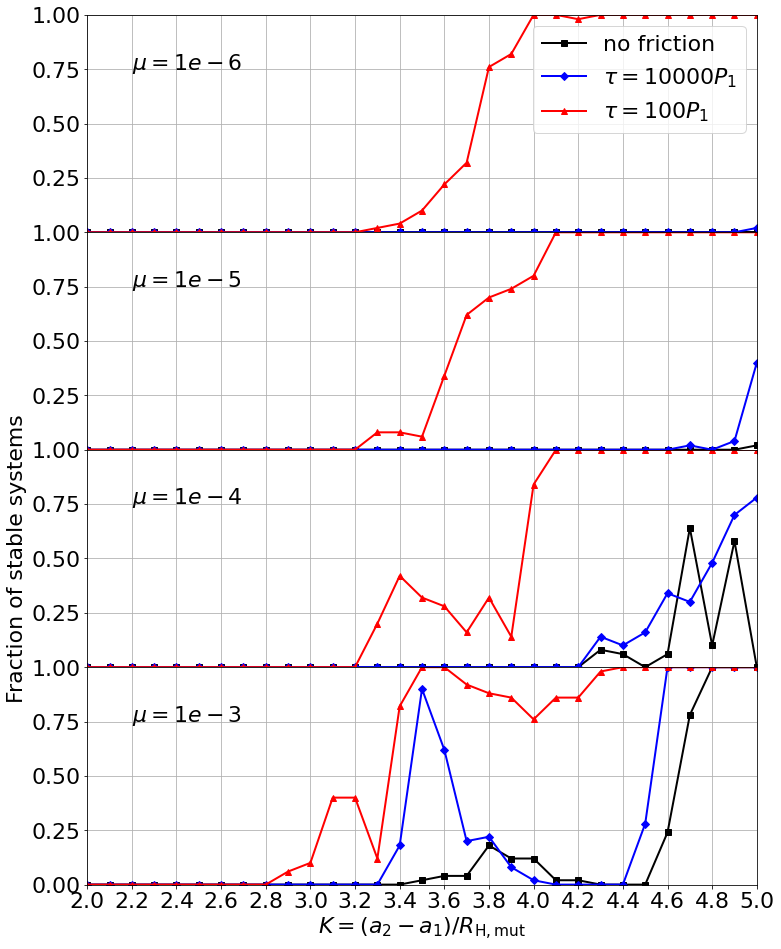

In [2]:
def resonance_to_K(res_val,mu):
    P1 = 1**(-1.5)
    P2 = P1*res_val
    a1 = P1**(2./3.)
    a2 = P2**(2./3.)
    RH = 0.5*(a1+a2) * ((1*mu)/3.)**(1./3.)
    return (a2-a1)/RH

from scipy.optimize import curve_fit

def frac_fit(K,Kcr,Kwid):
    return 1./(1.+np.exp(-(K-Kcr)/Kwid))

def frac_fit2(K,Kcr):
    return 1./(1.+np.exp(-(K-Kcr)/0.1))

fig,axs = plt.subplots(4,1, sharex=True, figsize=(12,16))
fig.subplots_adjust(hspace=0.0)

K_crit = 3.33697392249

cuse = plt.rcParams['axes.prop_cycle'].by_key()['color']
cuse = ['k','k','k','k','k']

dir_name_list = ['6','5','4','3']
mu_l = [1e-6,1e-5,1e-4,1e-3]


for iii in range(len(dir_name_list)):
    
    def Tins_fit(K,b):
        return  Tins_fit_full(K,b,mu_l[iii],K0_l[iii],Kc_l[iii])

    curr_dir = dir_name_list[iii]

    kk_list = np.linspace(2.0,5.0,31)

    res_frac = kk_list*0
    
    mu = mu_l[iii]

    for i in range(len(kk_list)):
        kk = kk_list[i]
        dir_str = str(int(kk*10))
        dir_name_str = './20220126/N3/m'+curr_dir+'t0T6/all_Tinst/Tinst-K'+dir_str
        #dir_name_str = 'd:/_work/K-test/LR-eps-2/wKt/mu-'+curr_dir+'-nf-wKt/collect_data/K'+dir_str
        all_data = np.load(dir_name_str+'.npy')

        Nrun = len(all_data[:,0])

        RH_data = all_data[ all_data[:,1]>0.5 , : ]
        sf_data = all_data[ all_data[:,0]>0.5 , : ]

        if RH_data.ndim >= 2:
            RH_time = RH_data[:,3]
            res_frac[i] = 1.-np.sum(RH_time[:]>0)/(Nrun*1.0)
            
    #res_frac = safe_t[:]
    #res_frac = 1.-mist_t[:]
    
    ex = int(curr_dir)
    muuu = 0.1**ex
    
    line, = axs[iii].plot(kk_list,res_frac,'s-',color='k',linewidth=2,label=r'no friction')
    
    #popt, pcov = curve_fit(frac_fit,kk_list,res_frac,p0=np.array([3.4,0.1]))

    #Kmax = np.max(kk_list)
    #k = len(kk_list)-1
    #while res_frac[k]>0.989:
    #    Kmax = kk_list[k]
    #    k = k-1
        
    #Kmin = np.min(kk_list)
    #k = 0
    #while res_frac[k]<0.011:
    #    Kmin = kk_list[k]
    #    k = k+1
        
    #axs[iii].fill_between([Kmin,Kmax],[0,0],[1,1],color = line.get_color(), alpha=0.1)
    #axs[iii].legend()      
    axs[iii].set_ylim([0, 1.00])
    axs[iii].grid()
    axs[iii].set_axisbelow(True)
    axs[iii].set_yticks([0.25,0.5,0.75,1.0])
    axs[iii].text(2.2,0.75,r'$\mu=1e-%d$'%int(curr_dir))    
    
    
    
for iii in range(len(dir_name_list)):
    
    def Tins_fit(K,b):
        return  Tins_fit_full(K,b,mu_l[iii],K0_l[iii],Kc_l[iii])

    curr_dir = dir_name_list[iii]

    kk_list = np.linspace(2.0,5.0,31)

    res_frac = kk_list*0
    
    mu = mu_l[iii]

    for i in range(len(kk_list)):
        kk = kk_list[i]
        dir_str = str(int(kk*10))
        dir_name_str = './20220126/N3/m'+curr_dir+'t4T6/all_Tinst/Tinst-K'+dir_str
        #dir_name_str = 'd:/_work/K-test/LR-eps-2/wKt/mu-'+curr_dir+'-nf-wKt/collect_data/K'+dir_str
        all_data = np.load(dir_name_str+'.npy')

        Nrun = len(all_data[:,0])

        RH_data = all_data[ all_data[:,1]>0.5 , : ]
        sf_data = all_data[ all_data[:,0]>0.5 , : ]

        if RH_data.ndim >= 2:
            RH_time = RH_data[:,3]
            res_frac[i] = 1.-np.sum(RH_time[:]>0)/(Nrun*1.0)
            
    #res_frac = safe_t[:]
    #res_frac = 1.-mist_t[:]
    
    ex = int(curr_dir)
    muuu = 0.1**ex
    
    line, = axs[iii].plot(kk_list,res_frac,'D-',color='b',linewidth=2,label=r'$\tau=10000P_1$')
    
    #popt, pcov = curve_fit(frac_fit,kk_list,res_frac,p0=np.array([3.4,0.1]))
    #axs[iii].plot(kk_list,frac_fit(kk_list,*popt),'k--',linewidth=2,alpha=0.8)

    
for iii in range(len(dir_name_list)):
    
    def Tins_fit(K,b):
        return  Tins_fit_full(K,b,mu_l[iii],K0_l[iii],Kc_l[iii])

    curr_dir = dir_name_list[iii]

    kk_list = np.linspace(2.0,5.0,31)

    res_frac = kk_list*0
    
    mu = mu_l[iii]

    for i in range(len(kk_list)):
        kk = kk_list[i]
        dir_str = str(int(kk*10))
        dir_name_str = './20220126/N3/m'+curr_dir+'t2T6/all_Tinst/Tinst-K'+dir_str
        #dir_name_str = 'd:/_work/K-test/LR-eps-2/wKt/mu-'+curr_dir+'-nf-wKt/collect_data/K'+dir_str
        #print(dir_name_str)
        all_data = np.load(dir_name_str+'.npy')

        Nrun = len(all_data[:,0])

        RH_data = all_data[ all_data[:,1]>0.5 , : ]
        sf_data = all_data[ all_data[:,0]>0.5 , : ]

        if RH_data.ndim >= 2:
            RH_time = RH_data[:,3]
            res_frac[i] = 1.-np.sum(RH_time[:]>0)/(Nrun*1.0)
            
    #res_frac = safe_t[:]
    #res_frac = 1.-mist_t[:]
    
    ex = int(curr_dir)
    muuu = 0.1**ex
    
    line, = axs[iii].plot(kk_list,res_frac,'^-',color='r',linewidth=2,label=r'$\tau=100P_1$')
    
'''   
kreso = resonance_to_K(14./13.,1e-5)
axs[2].axvline(x=kreso,lw=2,ls='--',c='r')
#axs[2].text(kreso,0.75,'14:13  ',ha='right',c='r')
        
#kreso = resonance_to_K(7./6.,1e-4)
#axs[3].axvline(x=kreso,lw=2,ls='--',c='r')
#kreso = resonance_to_K(22./19.,1e-4)
axs[3].axvline(x=kreso,lw=2,ls='--',c='r')
#axs[3].text(kreso,0.75,'22:19  ',ha='right',c='r')
kreso = resonance_to_K(29./25.,1e-4)
axs[3].axvline(x=kreso,lw=2,ls='--',c='r')
#axs[3].text(kreso,0.75,' 29:25',ha='left',c='r')
'''     
axs[iii].set_yticks([0.0,0.25,0.5,0.75,1.0])
axs[0].legend()
    
axs[iii].set_xlabel(r'$K= (a_2-a_1)/R_{\rm H,mut}}$')
axs[2].set_ylabel('Fraction of stable systems')

axs[iii].set_xlim([2.0,5.0])
axs[3].set_xticks(np.linspace(2.0,5.0,16))

plt.savefig('./pics/pics-fraction-N3-T6.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-fraction-N3-T6.png',bbox_inches='tight',transparent=True)